# 📊 Betimsel Analiz Yöntemleri: Veriyi Tanımanın Yolu

## Giriş: 

Diyelim ki elinde 1000 satır veri var.  
Sayılar karışık, anlamları yok gibi görünüyor.  
Ama sen sadece bir ortalama alıp medyanını bulduğun anda,  
verinin içindeki dengeyi görebiliyorsun.

> “Betimsel istatistik, verilere anlam kazandıran ilk adımdır.  
Veriyi tanıtmak için kullanılan en güçlü araçlardan biridir.”  

## 🧠 Betimsel İstatistik Nedir?

**Betimsel istatistik**, verileri özetlemek,  
görselleştirmek ve temel eğilimleri ortaya koymak için kullanılan yöntemlerdir.

📌 Amacı:
- Veriyi tanımlamak
- Merkezi eğilimi görmek
- Yayılımı ölçmek
- Dağılımın şeklini incelemek

## 🔍 Betimsel İstatistiğin Ana Yapıları

### 1. **Merkezi Eğilim Ölçüleri**
Verinin merkezini gösterir.

| Terim | Açıklama |
|--------|----------|
| **Ortalama (Mean)** | Tüm değerlerin ortalaması |
| **Medyan (Median)** | Ortadaki değer |
| **Mod (Mode)** | En çok tekrar eden değer |

#### Python Kodu:
```python
print("Ortalama:", np.mean(data))
print("Medyan:", np.median(data))
print("Mod:", pd.Series(data).mode()[0])
```



In [2]:
# sample data set

import numpy as np
import pandas as pd
from scipy import stats

# Sample data creation (product ratings on a 1-10 scale with some skewness)
np.random.seed(42)
data = np.concatenate([
    np.random.randint(1, 5, 30),      # Lower ratings
    np.random.randint(4, 7, 50),      # Middle ratings
    np.random.randint(6, 9, 40),      # Upper-middle ratings
    np.random.randint(9, 11, 20),      # Excellent ratings
    [10, 10, 10]                      # Some repeated high values for mode
])

# Convert to pandas Series
ratings = pd.Series(data, name="Product Ratings")

# Display first 10 values and distribution
print("Sample Data (first 10 values):\n", ratings.head(10))
print("\nValue Counts:\n", ratings.value_counts().sort_index())

Sample Data (first 10 values):
 0    3
1    4
2    1
3    3
4    3
5    4
6    1
7    1
8    3
9    2
Name: Product Ratings, dtype: int64

Value Counts:
 Product Ratings
1      5
2      6
3      9
4     25
5     20
6     31
7     11
8     13
9      9
10    14
Name: count, dtype: int64


In [3]:
print("\n=== Merkezi Eğilim Ölçüleri ===")
print("Ortalama:", np.mean(ratings))
print("Medyan:", np.median(ratings))
print("Mod:", ratings.mode()[0])


=== Merkezi Eğilim Ölçüleri ===
Ortalama: 5.818181818181818
Medyan: 6.0
Mod: 6


### 2. **Yayılım Ölçüleri**
Verinin nasıl yayıldığını gösterir.

| Terim | Açıklama |
|--------|----------|
| **Standart Sapma (Std Dev)** | Ortalama etrafındaki sapmayı gösterir |
| **Varyans (Variance)** | Standart sapmanın karesi |
| **Değişim Aralığı** | Maksimum - Minimum |
| **IQR (Çeyrekler Arası Aralık)** | Q3 - Q1 → orta %50’lik dilim |

#### Python Kodu:
```python
print("Standart Sapma:", np.std(data))
print("Varyans:", np.var(data))
print("Değişim Aralığı:", np.max(data) - np.min(data))
print("IQR:", scipy.stats.iqr(data))
```


In [4]:
print("\n=== Yayılım Ölçüleri ===")
print("Standart Sapma:", np.std(ratings))
print("Varyans:", np.var(ratings))
print("Değişim Aralığı:", np.max(ratings) - np.min(ratings))
print("IQR:", stats.iqr(ratings))


=== Yayılım Ölçüleri ===
Standart Sapma: 2.3433774073409213
Varyans: 5.4914176732358575
Değişim Aralığı: 9
IQR: 3.5


### 3. **Pozisyon Ölçüleri**
Veri içindeki yerimizi gösterir.

| Terim | Açıklama |
|--------|----------|
| **Minimum & Maksimum** | Verinin alt ve üst sınırları |
| **Çeyrekler (Q1, Q2, Q3)** | Veriyi dörde bölen noktalar |

#### Python Kodu:
```python
print("Min:", np.min(data))
print("Maks:", np.max(data))
print("Çeyrekler:", np.quantile(data, [0.25, 0.5, 0.75]))
```


In [5]:
print("\n=== Pozisyon Ölçüleri ===")
print("Min:", np.min(ratings))
print("Maks:", np.max(ratings))
print("Çeyrekler:", np.quantile(ratings, [0.25, 0.5, 0.75]))


=== Pozisyon Ölçüleri ===
Min: 1
Maks: 10
Çeyrekler: [4.  6.  7.5]


### 4. **Dağılım Şekli**
Veri simetrik mi? Eğik mi? Sivri mi?

| Terim | Açıklama |
|--------|----------|
| **Çarpıklık (Skewness)** | Simetri bozulması |
| **Basıklık (Kurtosis)** | Dağılımın sivriliği |

#### Python Kodu:
```python
from scipy.stats import skew, kurtosis

print("Çarpıklık:", skew(data))
print("Basıklık:", kurtosis(data))
```

✅ Çarpıklık > 0 → sağa çarpık  
✅ Çarpıklık < 0 → sola çarpık  
✅ Çarpıklık = 0 → simetrik  

In [6]:
print("\n=== Dağılım Şekli ===")
print("Çarpıklık:", stats.skew(ratings))
print("Basıklık:", stats.kurtosis(ratings))


=== Dağılım Şekli ===
Çarpıklık: 0.11476534512541625
Basıklık: -0.6022599142339167


## 📈 Görselleştirme ile Betimlemek

### Histogram + KDE (Yoğunluk Grafiği)

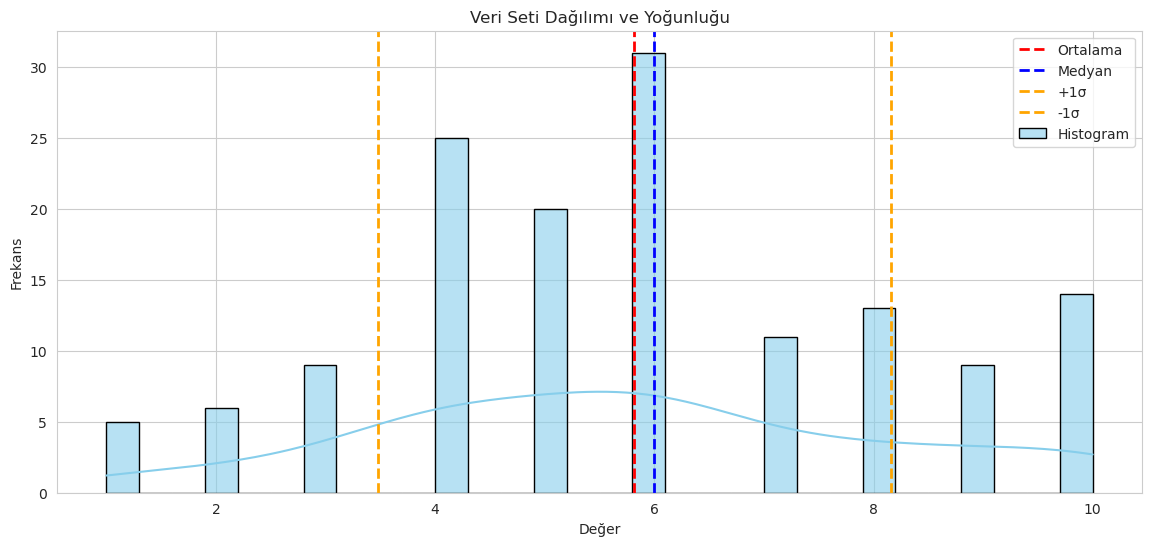

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Histogram + KDE
sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.6, label='Histogram')
plt.title('Veri Seti Dağılımı ve Yoğunluğu')
plt.xlabel('Değer')
plt.ylabel('Frekans')

# Ortalama, Medyan, ±1σ çizgileri
plt.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label='Ortalama')
plt.axvline(np.median(data), color='blue', linestyle='--', linewidth=2, label='Medyan')
plt.axvline(np.mean(data) + np.std(data), color='orange', linestyle='--', linewidth=2, label='+1σ')
plt.axvline(np.mean(data) - np.std(data), color='orange', linestyle='--', linewidth=2, label='-1σ')

plt.legend()
plt.show()

📌 Bu grafikte:
- Ortalama (mean)
- Medyan (median)
- Standart sapma aralıkları
- Yoğunluk (KDE)

Hepsi aynı grafikte!

## 📋 Frekans Dağılımı: Hangi Değer Kaç Kez Geçiyor?

In [8]:
frekans = pd.Series(data).value_counts(bins=5)
print("Veri Dilim Frekansları:\n", frekans)

Veri Dilim Frekansları:
 (4.6, 6.4]     51
(2.8, 4.6]     34
(6.4, 8.2]     24
(8.2, 10.0]    23
(0.99, 2.8]    11
Name: count, dtype: int64


✅ Bu çıktı, verinin hangi aralıkta ne kadar yoğun olduğunu gösterir.

## 📉 Betimsel İstatistik ve Makine Öğrenmesi Bağlantısı

| Kavram | Neden Önemli? |
|--------|----------------|
| **Ortalama / Medyan** | Aykırı değerlere dayanıklı modelleme |
| **Standart Sapma** | Verinin ne kadar tutarlı olduğunu gösterir |
| **Çarpıklık** | Normal dağılıma uygunluk testi için gerekli |
| **IQR** | Aykırı değerleri elemek için kullanılır |
| **Grafiğe Döküm** | Modelin giriş verisi hakkında bilgi verir |

📌 İyi bir betimsel analiz,  
modelleme sürecini başlatmak için gereklidir.


## 🧪 Gerçek Hayatta Nasıl Kullanılır?

| Sorun | Yöntem |
|--------|--------|
| “Satış verisinde aykırı değerler var mı?” | IQR + Box Plot |
| “Veri normal dağılıyor mu?” | Histogram + Skewness |
| “Hangi değişken daha güçlü?” | Korelasyon matrisi |
| “Veri simetrik mi?” | Çarpıklık kontrolü |
| “Veri güven aralığı nerede?” | Ortalama ± z * std_dev |
| “Hangi ürün daha çok satılıyor?” | Mod ve gruplama |


# Gerçek hayat verisine benzer başka bir örnek:

Kavramları örneklemek için ideal: Ortalama, medyan, varyans, standart sapma.

Görsel olarak da yorum yapılabilir: Sınav başarısı, normal dağılımın sınırları, vs.


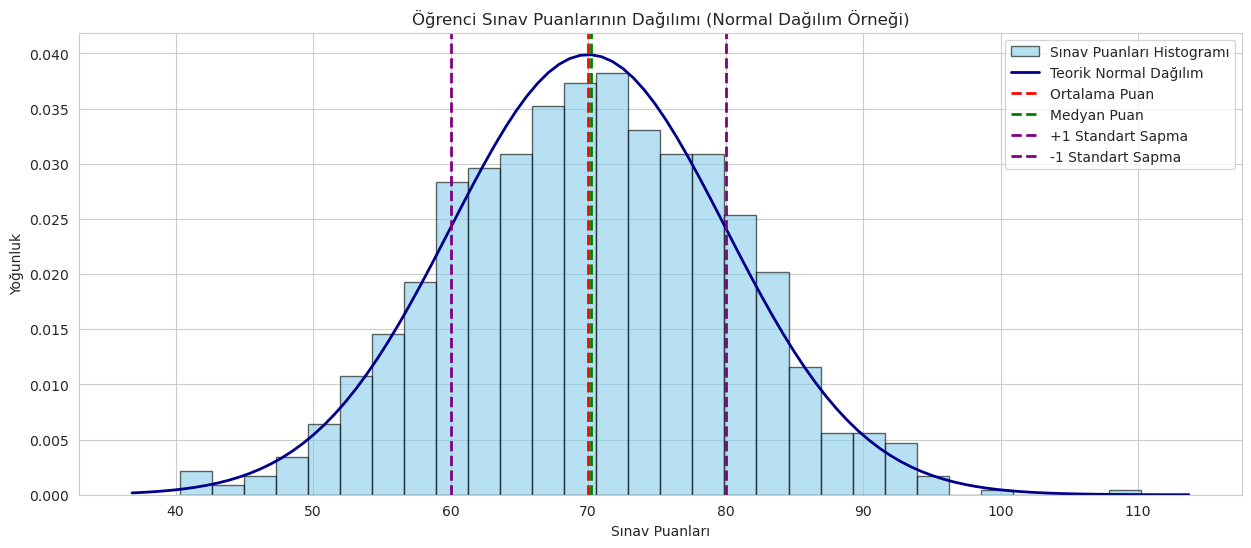

Ortalama Puan: 70
Medyan Puan: 70.2
Standart Sapma: 10
Varyans: 102.66


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Öğrenci sınav puanlarını temsil eden normal dağılıma sahip veri oluşturma
mean_score = 70  # Ortalama sınav puanı
std_dev_score = 10  # Standart sapma

np.random.seed(24)  # Rastgelelik için farklı bir seed
exam_scores = np.random.normal(mean_score, std_dev_score, 1000)  # 1000 öğrenci puanı

# İstatistiksel değerleri hesapla
median_score = np.median(exam_scores)
variance_score = np.var(exam_scores)

# Grafik oluşturma
plt.figure(figsize=(15, 6))
plt.hist(exam_scores, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sınav Puanları Histogramı')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = (1 / (std_dev_score * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_score)**2 / (2 * std_dev_score**2))
plt.plot(x, pdf, 'darkblue', linewidth=2, label='Teorik Normal Dağılım')

# Ortalama, medyan ve 1σ aralığını göster
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label='Ortalama Puan')
plt.axvline(median_score, color='green', linestyle='dashed', linewidth=2, label='Medyan Puan')
plt.axvline(mean_score + std_dev_score, color='purple', linestyle='dashed', linewidth=2, label='+1 Standart Sapma')
plt.axvline(mean_score - std_dev_score, color='purple', linestyle='dashed', linewidth=2, label='-1 Standart Sapma')

plt.title('Öğrenci Sınav Puanlarının Dağılımı (Normal Dağılım Örneği)')
plt.xlabel('Sınav Puanları')
plt.ylabel('Yoğunluk')
plt.legend()
plt.grid(True)
plt.show()

# Temel istatistiksel bilgileri yazdır
print("Ortalama Puan:", round(mean_score, 2))
print("Medyan Puan:", round(median_score, 2))
print("Standart Sapma:", round(std_dev_score, 2))
print("Varyans:", round(variance_score, 2))


📊 Betimsel İstatistik: Merkezi Eğilim ve Yayılım Ölçüleri

In [11]:
#gerekli kutuphanelerin yuklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, skew, kurtosis

In [12]:
# sample veri olusturma
np.random.seed(42)  # Tekrar edilebilirlik için

# Fiyat ve satış adedi ile yapay veri oluşturma
veri_sayisi = 1000
fiyatlar = np.random.normal(loc=250, scale=50, size=veri_sayisi).round(2)
satis_adetleri = np.random.poisson(lam=10, size=veri_sayisi)

# DataFrame'e çevir
df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

print("Sample veri seti ilk 5 satır:")
print(df.head())

Sample veri seti ilk 5 satır:
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9


In [13]:
# Betimsel istatistik analizi
# ortalama, medyan, mod

ortalama_fiyat = np.mean(df['fiyat'])
medyan_fiyat = np.median(df['fiyat'])
mod_kategori = df['satis_adedi'].mode()[0]  # Kesikli olduğu için mod da anlamlıdır

print(f"Ortalama Fiyat: {ortalama_fiyat:.2f} TL")
print(f"Medyan Fiyat: {medyan_fiyat:.2f} TL")
print(f"En Sık Görülen Satış Adedi (Mod): {mod_kategori}")

Ortalama Fiyat: 250.97 TL
Medyan Fiyat: 251.26 TL
En Sık Görülen Satış Adedi (Mod): 9


In [14]:
#yayılım ölçüleri
std_fiyat = np.std(df['fiyat'])
var_fiyat = np.var(df['fiyat'])
değişim_aralığı = df['fiyat'].max() - df['fiyat'].min()
iqr_degeri = iqr(df['fiyat'])

print(f"Standart Sapma: {std_fiyat:.2f} TL")
print(f"Varyans: {var_fiyat:.2f}")
print(f"Değişim Aralığı: {değişim_aralığı:.2f} TL")
print(f"IQR (Çeyrekler Arası Aralık): {iqr_degeri:.2f}")

Standart Sapma: 48.94 TL
Varyans: 2394.77
Değişim Aralığı: 354.70 TL
IQR (Çeyrekler Arası Aralık): 64.77


In [15]:
# Dağılım Şekli: Çarpıklık & Basıklık
carpiklik = skew(df['fiyat'])
basiklik = kurtosis(df['fiyat'])

print(f"Çarpıklık: {carpiklik:.2f}")
print(f"Basıklık: {basiklik:.2f}")

Çarpıklık: 0.12
Basıklık: 0.07


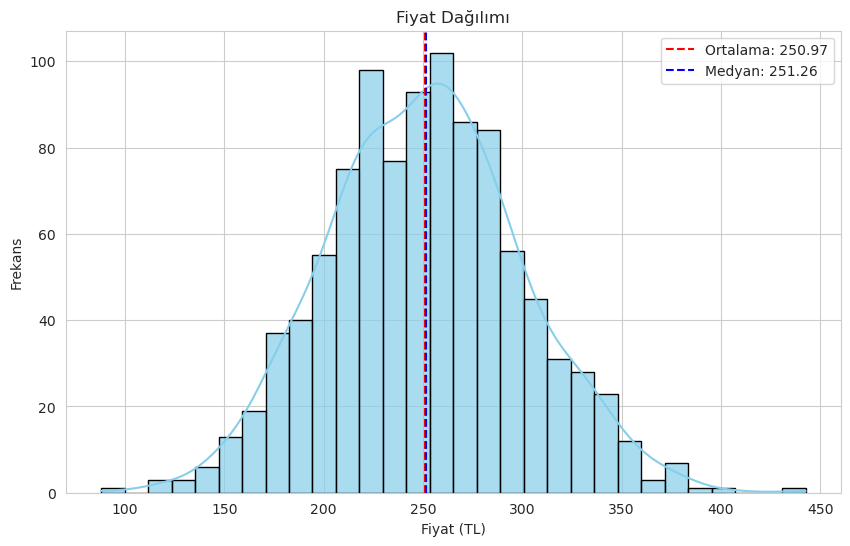

In [16]:
# Histogram + KDE (Yoğunluk Grafiği)

plt.figure(figsize=(10,6))
sns.histplot(df['fiyat'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(ortalama_fiyat, color='red', linestyle='--', label=f'Ortalama: {ortalama_fiyat:.2f}')
plt.axvline(medyan_fiyat, color='blue', linestyle='--', label=f'Medyan: {medyan_fiyat:.2f}')
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat (TL)")
plt.ylabel("Frekans")
plt.legend()
plt.show()

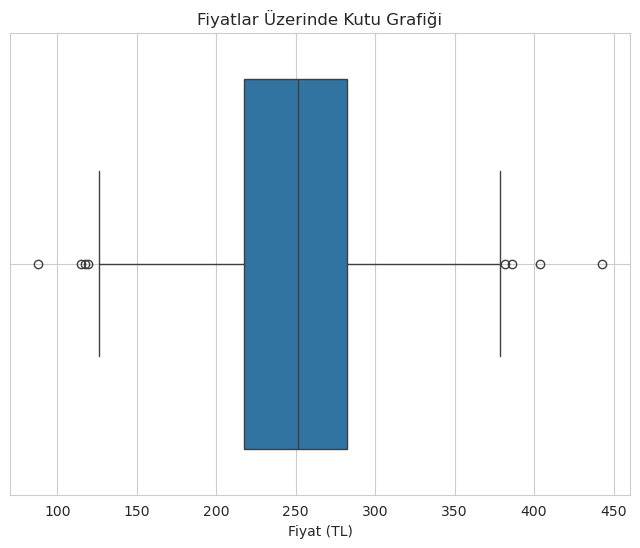

In [17]:
# Box Plot: Aykırı Değerleri Yakalamak İçin Kullanılır
plt.figure(figsize=(8,6))
sns.boxplot(x=df['fiyat'])
plt.title("Fiyatlar Üzerinde Kutu Grafiği")
plt.xlabel("Fiyat (TL)")
plt.grid(True)
plt.show()

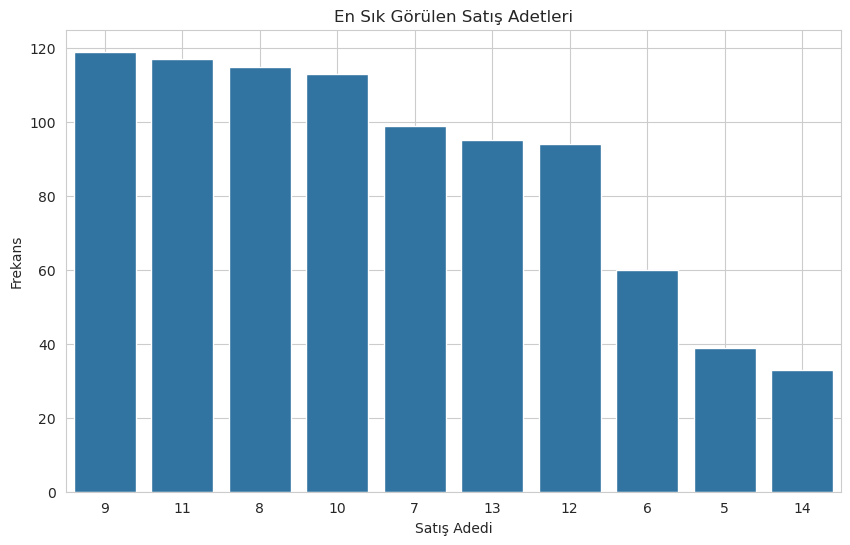

In [18]:
# Bar Grafik: En Çok Satılan Ürün Sayısı (Mod)
plt.figure(figsize=(10,6))
sns.countplot(x='satis_adedi', data=df, order=df['satis_adedi'].value_counts().index[:10])
plt.title("En Sık Görülen Satış Adetleri")
plt.xlabel("Satış Adedi")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

In [19]:
# describe() ile Hızlı Betimsel Analiz
print("Betimsel istatistik özeti:\n", df.describe(include='all'))

Betimsel istatistik özeti:
              fiyat  satis_adedi
count  1000.000000  1000.000000
mean    250.966520    10.007000
std      48.960869     3.227595
min      87.940000     2.000000
25%     217.620000     8.000000
50%     251.265000    10.000000
75%     282.395000    12.000000
max     442.640000    21.000000


## 📌 Özet Tablo: Hangi Ölçek Türü Ne İçin Uygun?

|Ölçek Türü|Ortalama|Medyan|Mod|Standart Sapma|Korelasyon|
|---|---|---|---|---|---|
|Nominal|❌|❌|✅|❌|❌|
|Ordinal|⚠️|✅|✅|⚠️|⚠️|
|Interval|✅|✅|✅|✅|✅|
|Ratio|✅|✅|✅|✅|✅|

📌 Veri türünü tanırsan,  
uygulanabilecek işlemleri de bilirsin.